In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def simulate_stadium_billiard(L, n):
    # Constants
    r = 1
    xc_left = 0
    xc_right = L

    # Initialize the position and momentum
    x = np.random.uniform(-r, r)
    y = np.random.uniform(-r, r)
    px = np.random.choice([-1, 1])
    py = np.sqrt(1 - px**2)

    # Save the reflection points
    reflection_points = [(x, y)]

    # Simulate the billiard motion
    for _ in range(n):
        # Determine which side the particle will hit
        if y + py >= r:
            # Reflection from the top line segment
            x_new = x + px * (r - y) / py
            y_new = r
            px_new, py_new = px, -py
        elif y + py <= -r:
            # Reflection from the bottom line segment
            x_new = x + px * (-r - y) / py
            y_new = -r
            px_new, py_new = px, -py
        elif x >= xc_right:
            # Check if the particle exceeds the right semicircle boundary
            if (x - xc_right)**2 + y**2 > r**2:
                # Move the particle inside the semicircle boundary
                phi = np.arctan2(y, (x - xc_right))
                x = xc_right + r * np.cos(phi)
                y = r * np.sin(phi)

            # Reflection from the right semicircle
            phi = np.arccos((x - xc_right) / r)
            x_new = xc_right - r * np.sin(phi)
            y_new = y + py * (x_new - x) / px
            px_new = (y_new**2 - (x_new - xc_right)**2) * px - 2 * (x_new - xc_right) * y_new * py
            py_new = -2 * (x_new - xc_right) * y_new * px + ((x_new - xc_right)**2 - y_new**2) * py
        else:
            # Check if the particle exceeds the left semicircle boundary
            if (x - xc_left)**2 + y**2 > r**2:
                # Move the particle inside the semicircle boundary
                phi = np.arctan2(y, (x - xc_left))
                x = xc_left + r * np.cos(phi)
                y = r * np.sin(phi)

            # Reflection from the left semicircle
            phi = np.arccos((x - xc_left) / r)
            x_new = xc_left + r * np.sin(phi)
            y_new = y + py * (x_new - x) / px
            px_new = (y_new**2 - (x_new - xc_left)**2) * px - 2 * (x_new - xc_left) * y_new * py
            py_new = -2 * (x_new - xc_left) * y_new * px + ((x_new - xc_left)**2 - y_new**2) * py

        # Update the position and momentum
        x, y = x_new, y_new
        px, py = px_new, py_new

        # Save the reflection point
        reflection_points.append((x, y))

    return reflection_points

In [ ]:
def test_uniformity(reflection_points, M):
    # Extract x-coordinate values
    x_values = [point[0] for point in reflection_points]

    # Divide the unit interval into M equal bins
    bins = np.linspace(-1, 1, M + 1)
    counts, _ = np.histogram(x_values, bins=bins)

    # Compute the mean and variance of the number of entries in the bins
    mean_count = np.mean(counts)
    var_count = np.var(counts)

    return mean_count, var_count

In [ ]:
def plot_billiard_path(reflection_points):
    # Extract x and y coordinates from the reflection points
    x_values = [point[0] for point in reflection_points]
    y_values = [point[1] for point in reflection_points]

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot the regular motion path in blue
    ax.plot(x_values, y_values, color='blue', label='Regular Motion')

    # Plot the reversed motion path in red
    ax.plot(x_values[::-1], y_values[::-1], color='red', label='Reversed Motion')

    # Set the axis labels and title
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Stadium Billiard Path')

    # Add a legend
    ax.legend()

    # Show the plot
    plt.show()

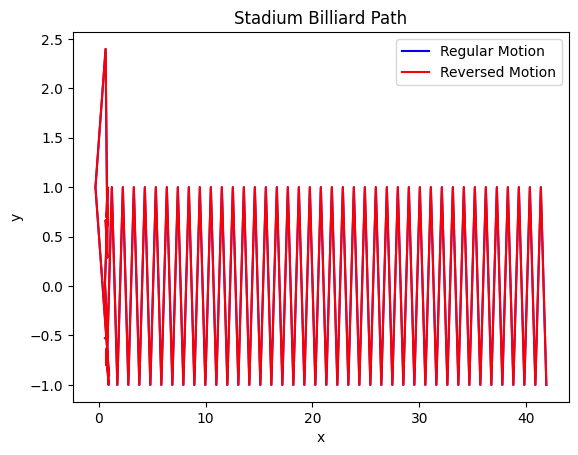

Mean Count: 2.1
Variance of Count: 17.290000000000003
-----------


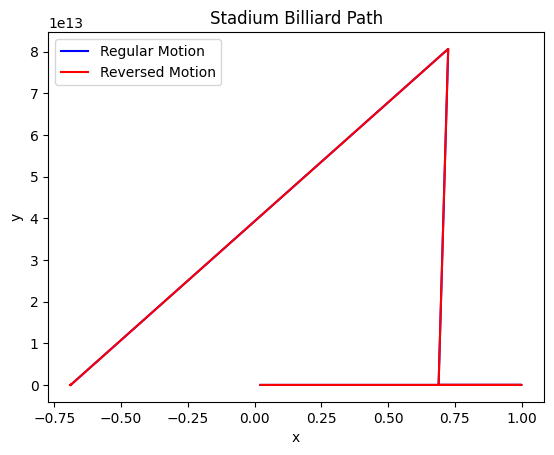

Mean Count: 10.1
Variance of Count: 839.4900000000001
-----------


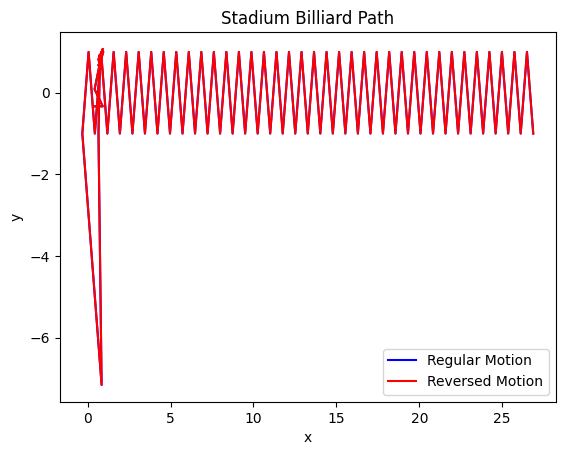

Mean Count: 3.2
Variance of Count: 38.56
-----------


In [ ]:
# Simulation parameters
L_values = [1, 2, 3]  # Different values of L
n = 100  # Number of reflections
M = 10  # Number of bins for testing uniformity

# Simulate and plot the billiard paths for different L values
for L in L_values:
    reflection_points = simulate_stadium_billiard(L, n)
    plot_billiard_path(reflection_points)

    # Test the uniformity
    mean_count, var_count = test_uniformity(reflection_points, M)
    print(f"Mean Count: {mean_count}")
    print(f"Variance of Count: {var_count}")
    print("-----------")